In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# 1. Load the dataset
df = pd.read_csv('breast-cancer-data.csv')

print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isnull().sum())

df = df.loc[:, ~df.columns.str.contains('^id|^Unnamed', case=False)]

Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Missing values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
per

In [6]:
# 2. Encode target variable (usually 'diagnosis' column: B=Benign, M=Malignant)
label_col = 'diagnosis'
df[label_col] = LabelEncoder().fit_transform(df[label_col])  # B=0, M=1

In [8]:
# 3. Split into features and target
X = df.drop(label_col, axis=1)
y = df[label_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# 4. Logistic Regression before PCA
model_before = LogisticRegression(max_iter=1000)
model_before.fit(X_train, y_train)
pred_before = model_before.predict(X_test)
print("Accuracy before PCA:", accuracy_score(y_test, pred_before))

Accuracy before PCA: 0.9736842105263158


In [12]:
# 5. Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"Number of PCA components to retain 95% variance: {pca.n_components_}")

model_after = LogisticRegression(max_iter=1000)
model_after.fit(X_train_pca, y_train)
pred_after = model_after.predict(X_test_pca)
print("Accuracy after PCA:", accuracy_score(y_test, pred_after))


Number of PCA components to retain 95% variance: 10
Accuracy after PCA: 0.9824561403508771


In [16]:
# 6.Confusion Matrix
print("Confusion Matrix (After PCA):\n", confusion_matrix(y_test, pred_after))
print("\nClassification Report (After PCA):\n", classification_report(y_test, pred_after))

Confusion Matrix (After PCA):
 [[70  1]
 [ 1 42]]

Classification Report (After PCA):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



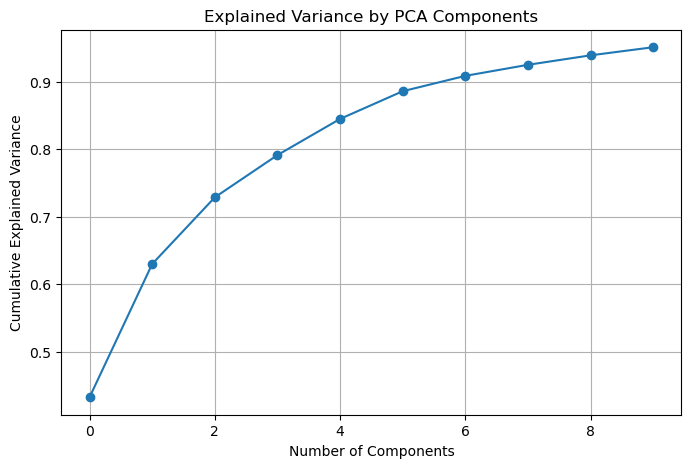

In [18]:
# 7.Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()